#Soft Sensors
###Predicción de la temperatura superficial promedio mediante variables operativas del proceso

Diego Alejandro Reyes Chamorro

In [ ]:
#importamos las librerias correspondientes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. preprocessing import StandardScaler


In [ ]:
#Cargamos los datos del proceso operativo
df = pd.read_csv('/content/Data_1.csv', sep = ';')

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39639 entries, 0 to 39638
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   distance             39639 non-null  int64
 1   speed                39639 non-null  int64
 2   temp_t1              39639 non-null  int64
 3   temp_t2              39639 non-null  int64
 4   temp_t3_c1           39639 non-null  int64
 5   temp_t3_c2           39639 non-null  int64
 6   temp_t3_c3           39639 non-null  int64
 7   surface_temp_left    39639 non-null  int64
 8   surface_temp_center  39639 non-null  int64
 9   surface_temp_right   39639 non-null  int64
 10  width                39639 non-null  int64
dtypes: int64(11)
memory usage: 3.3 MB


In [ ]:
df.head()

,distance,speed,temp_t1,temp_t2,temp_t3_c1,temp_t3_c2,temp_t3_c3,surface_temp_left,surface_temp_center,surface_temp_right,width
0,64,0,18,18,17,17,18,20,19,20,1271
1,83,0,18,18,17,17,18,20,20,20,1374
2,83,0,18,18,17,17,18,20,19,19,1374
3,83,0,18,18,17,17,18,20,19,19,1374
4,83,0,18,18,17,17,18,20,20,20,1374



Histogramas de variables numéricas:


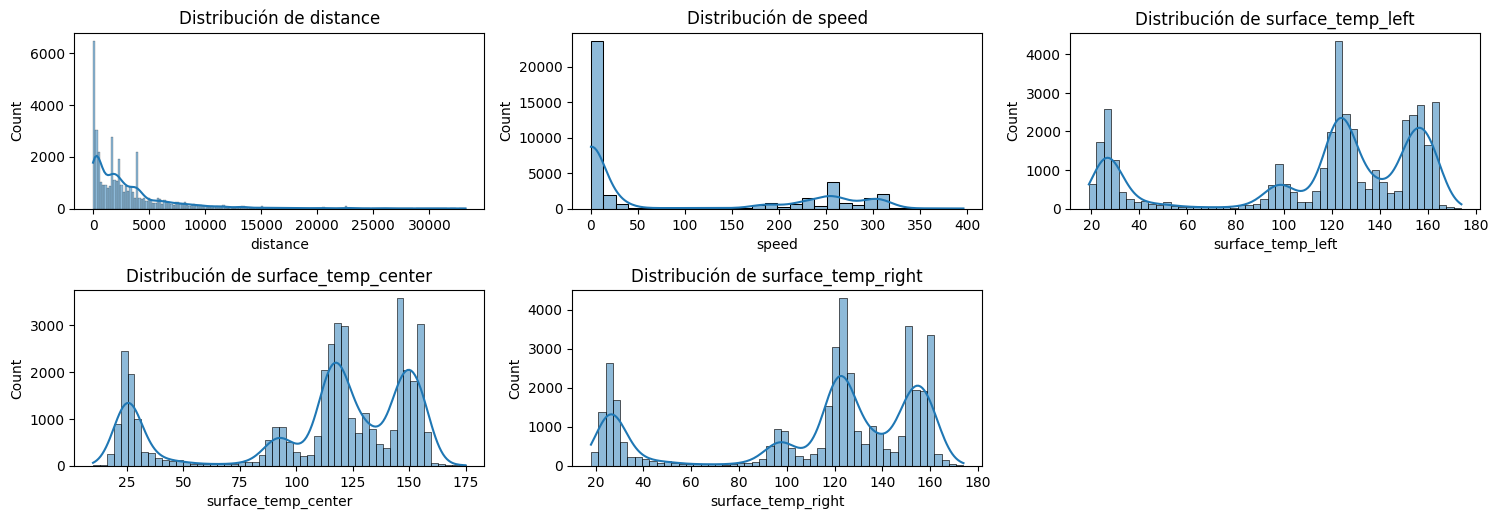


Estadísticas descriptivas adicionales para variables numéricas:


,distance,speed,surface_temp_left,surface_temp_center,surface_temp_right
skew,2.787569,0.816672,-0.994064,-0.957585,-0.993577
kurtosis,10.665242,-1.178366,-0.354645,-0.412972,-0.360758


In [ ]:
#Analisis Exploratorio de los datos

numerical_cols = ['distance', 'speed', 'surface_temp_left', 'surface_temp_center', 'surface_temp_right' ]

print("\nHistogramas de variables numéricas:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

print("\nEstadísticas descriptivas adicionales para variables numéricas:")
display(df[numerical_cols].agg(['skew', 'kurtosis']))

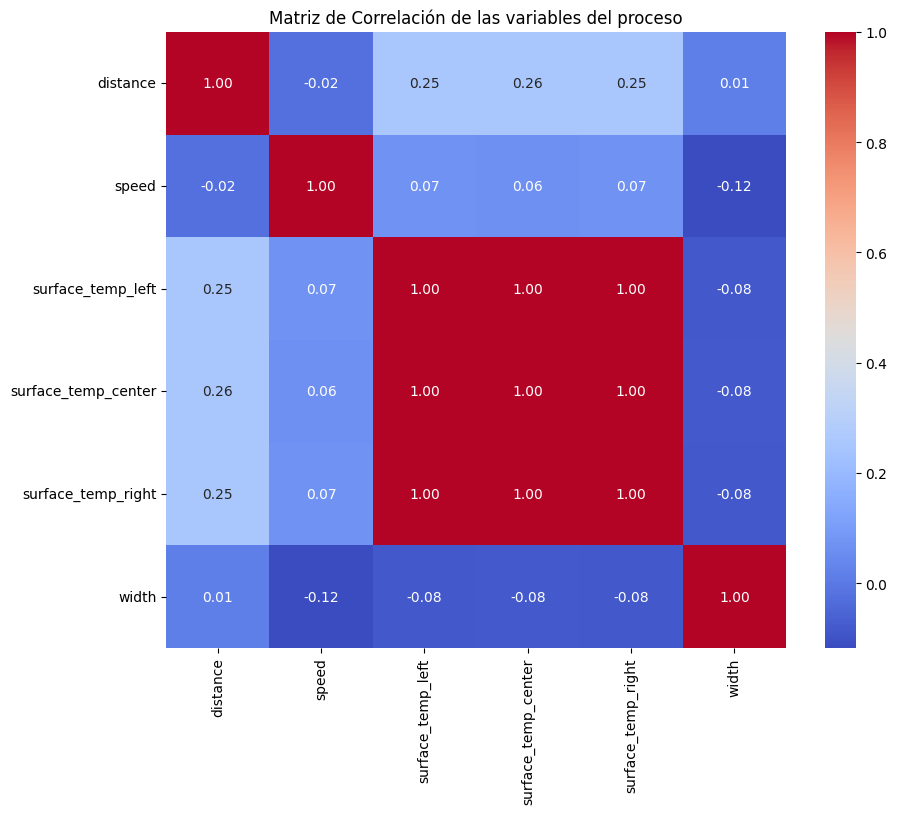

In [ ]:
#Correlation matrix
df.columns = df.columns.str.strip()
numerical_cols2 = ['distance', 'speed', 'surface_temp_left', 'surface_temp_center', 'surface_temp_right', 'width']
correlation_matrix = df[numerical_cols2].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las variables del proceso')
plt.show()

Para el modelado de Machine learning supondremos que la maquina opera de forma continua, es decir que el valor de la velocidad es mayor que 0 para poder predecir el dato que queremos definir

In [ ]:
#Filtar los datos de Speed >0
df_ml = df[df["speed"] > 0].copy()


In [ ]:
#validamos los datos
df_ml. head()

,distance,speed,temp_t1,temp_t2,temp_t3_c1,temp_t3_c2,temp_t3_c3,surface_temp_left,surface_temp_center,surface_temp_right,width
63,88,87,72,17,85,90,89,124,118,118,1382
64,219,134,73,17,99,105,106,114,122,117,1409
89,416,203,49,18,110,110,110,111,108,114,1493
90,622,203,50,18,109,109,109,84,80,86,1548
91,829,203,51,18,110,108,109,93,88,91,1554


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = df['surface_temp_center']
X_cols = ['distance', 'speed', 'width', 'temp_t1', 'temp_t2','temp_t3_c2', 'temp_t3_c3']
X = df[X_cols]
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(x_train_m, y_train_m)
y_pred_m = model_lr.predict(x_test_m)

mae = mean_absolute_error(y_test_m, y_pred_m)
rmse = np.sqrt(mean_squared_error(y_test_m, y_pred_m))
r2 = r2_score(y_test_m, y_pred_m)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


MAE: 19.971567766047368
RMSE: 28.68554483918701
R2: 0.5733825595572307


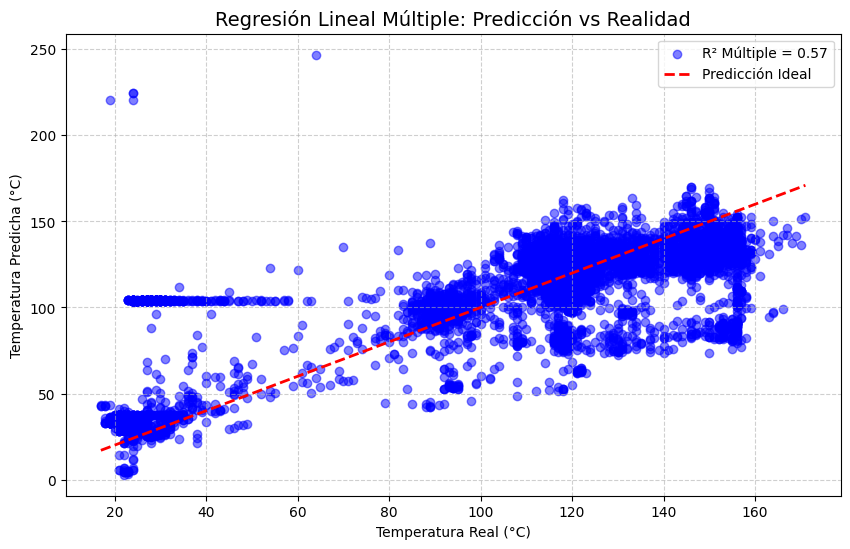

In [ ]:
#Grafico Regresion Lineal Multple
r2_multiple_linear = r2_score(y_test_m, y_pred_m)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_m, y_pred_m, color='blue', alpha=0.5,
            label=f'R² Múltiple = {r2_multiple_linear:.2f}')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()],
         'r--', lw=2, label='Predicción Ideal')
plt.title('Regresión Lineal Múltiple: Predicción vs Realidad', fontsize=14)
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Construccion Del Modelo De Machine Learning Por Red Neuronal

In [ ]:
x = df_ml[['distance', 'speed', 'width', 'temp_t1', 'temp_t2', 'temp_t3_c1', 'temp_t3_c2', 'temp_t3_c3']]
y = df_ml['surface_temp_center']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3 , random_state=3)

In [ ]:
scaler= StandardScaler ()

#Estandarizamos la data de X_train y x_test
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

#Conversion de array a dataframe
x_train_std = pd.DataFrame(x_train_std, columns=x_train.columns)
x_test_std = pd.DataFrame(x_test_std, columns=x_test.columns)

In [ ]:
#Modelamiento
from sklearn.neural_network import MLPRegressor

In [ ]:
model= MLPRegressor(hidden_layer_sizes=(120), activation='tanh', solver='adam', max_iter=300, random_state=1, learning_rate_init=0.005)

model.fit (x_train_std,y_train)

y_pred= model.predict(x_test_std)


In [ ]:
# Calculo del Error del Modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(x_test_std)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 4.350448199608022
RMSE: 7.164104215967561
R2: 0.8317950203441336


In [ ]:
#Mostrar los resultados obtenidos

y_pred = model.predict(x_test_std)
df_resultados = pd.DataFrame({
    'Real': y_test.values,
    'Predicha': y_pred
})

df_resultados.head(10)

,Real,Predicha
0,121,123.931966
1,90,93.173038
2,115,118.508531
3,122,115.031073
4,131,129.813471
5,90,91.154326
6,95,97.012629
7,119,122.915852
8,154,127.850030
9,132,134.283760


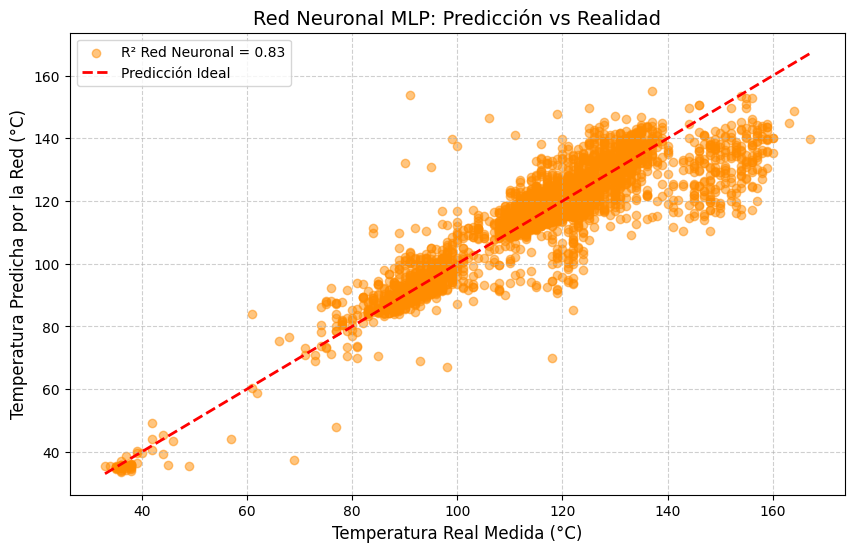

In [ ]:
#Grafica las temperaturas reales vs predichas
from sklearn.metrics import r2_score
r2_red = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', alpha=0.5,
            label=f'R² Red Neuronal = {r2_red:.2f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Predicción Ideal')
plt.title('Red Neuronal MLP: Predicción vs Realidad', fontsize=14)
plt.xlabel('Temperatura Real Medida (°C)', fontsize=12)
plt.ylabel('Temperatura Predicha por la Red (°C)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

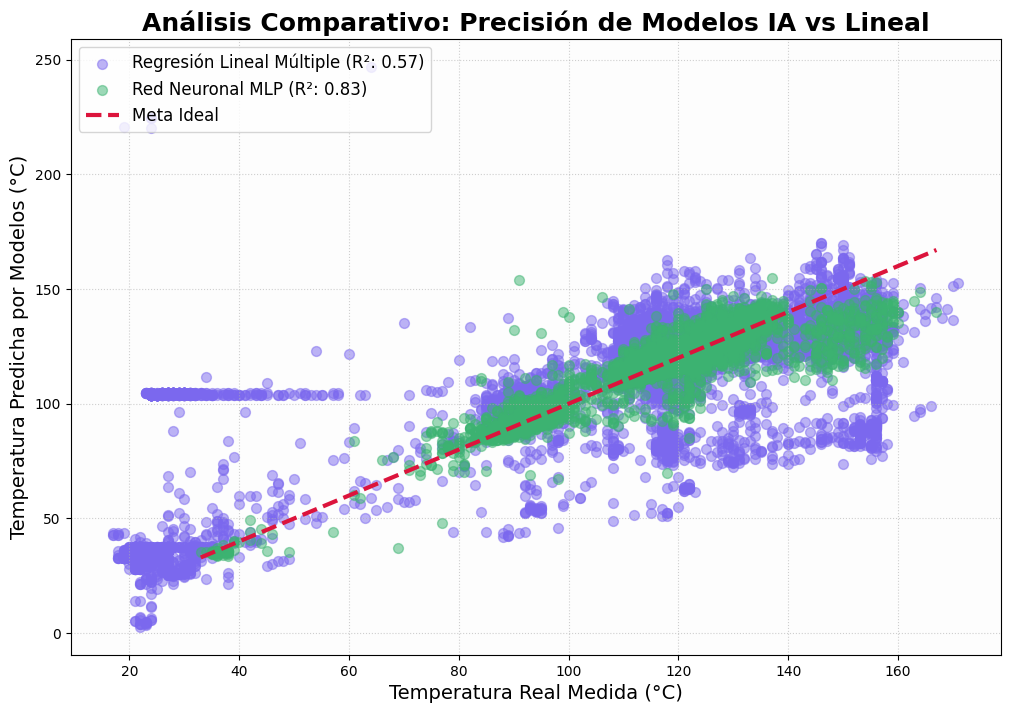

In [ ]:
#Grafica Comparativa
plt.figure(figsize=(12, 8))
plt.scatter(y_test_m, y_pred_m, color='mediumslateblue', alpha=0.5, s=50,
            label=f'Regresión Lineal Múltiple (R²: {r2_score(y_test_m, y_pred_m):.2f})')
plt.scatter(y_test, y_pred, color='mediumseagreen', alpha=0.5, s=50,
            label=f'Red Neuronal MLP (R²: {r2_score(y_test, y_pred):.2f})')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='crimson', lw=3, linestyle='--', label='Meta Ideal')
plt.title('Análisis Comparativo: Precisión de Modelos IA vs Lineal', fontsize=18, fontweight='bold')
plt.xlabel('Temperatura Real Medida (°C)', fontsize=14)
plt.ylabel('Temperatura Predicha por Modelos (°C)', fontsize=14)

plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle=':', alpha=0.6)
plt.gca().set_facecolor('#fdfdfd')

plt.show()

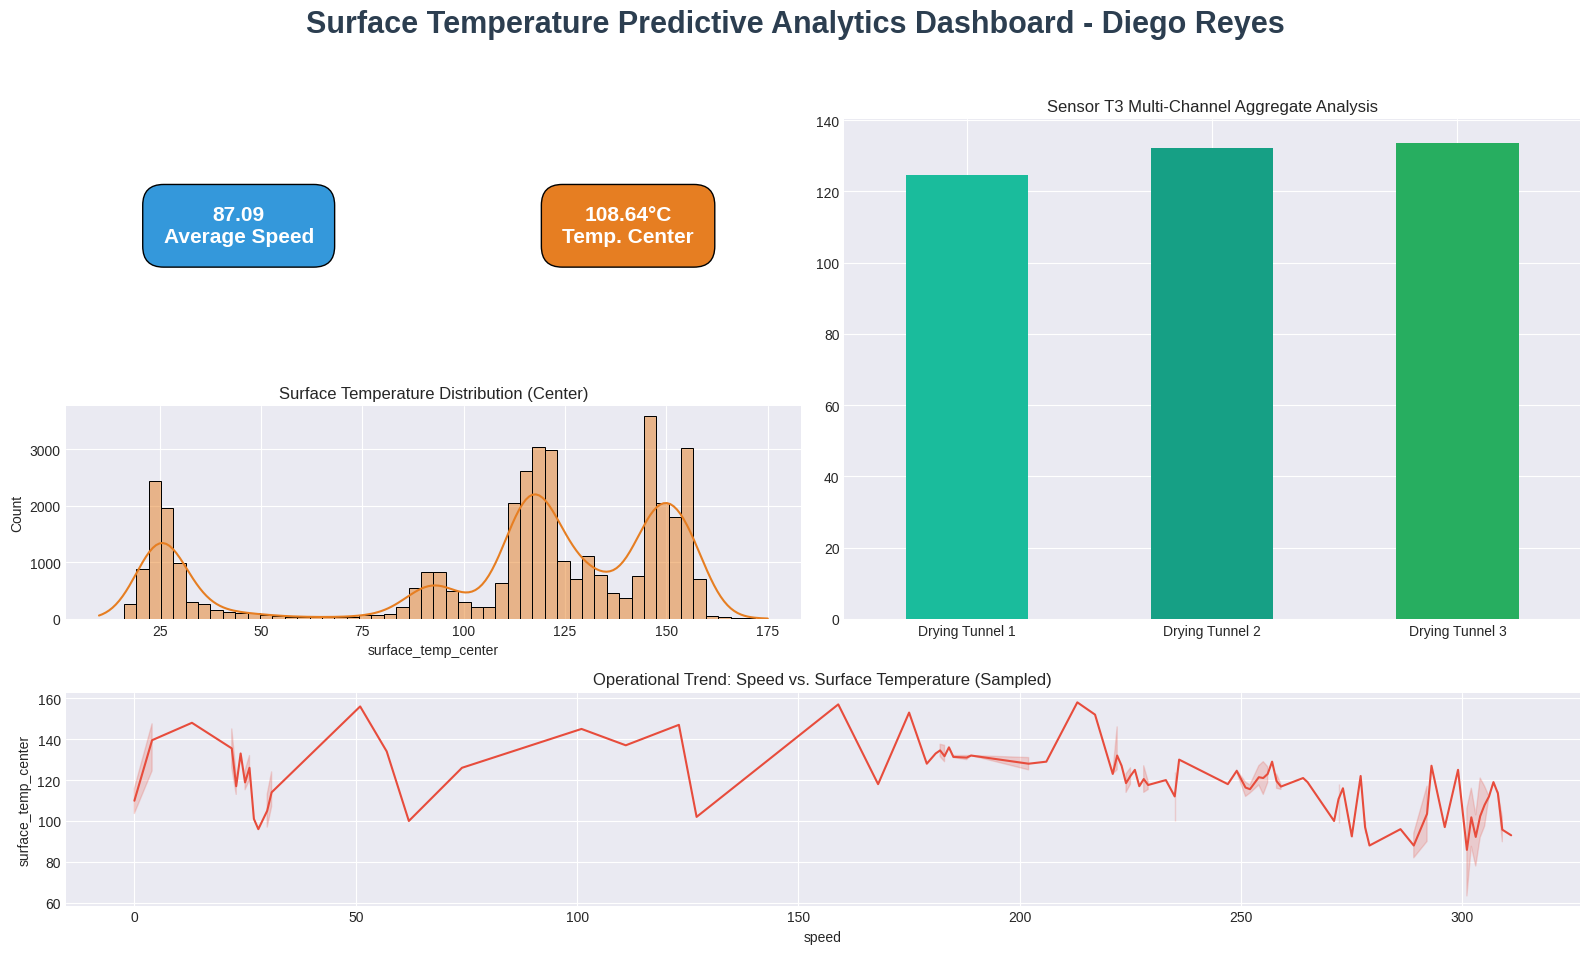

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Surface Temperature Predictive Analytics Dashboard - Diego Reyes', fontsize=22, fontweight='bold', color='#2c3e50')

# 1. KPI: Velocidad Promedio
ax1 = plt.subplot2grid((3, 4), (0, 0))
ax1.text(0.5, 0.5, f"{df['speed'].mean():.2f}\nAverage Speed", fontsize=15, ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='#3498db', boxstyle='round,pad=1'))
ax1.axis('off')

# 2. KPI: Temperatura Superficial Media
ax2 = plt.subplot2grid((3, 4), (0, 1))
ax2.text(0.5, 0.5, f"{df['surface_temp_center'].mean():.2f}°C\nTemp. Center", fontsize=15, ha='center', va='center', fontweight='bold', color='white', bbox=dict(facecolor='#e67e22', boxstyle='round,pad=1'))
ax2.axis('off')

# 3. Gráfico de Distribución del Target
ax3 = plt.subplot2grid((3, 4), (1, 0), colspan=2)
sns.histplot(df['surface_temp_center'], kde=True, ax=ax3, color='#e67e22')
ax3.set_title('Surface Temperature Distribution (Center)')

# 4. Comparativa de Canales Sensor T3
ax4 = plt.subplot2grid((3, 4), (0, 2), colspan=2, rowspan=2)
t3_data = df[['temp_t3_c1', 'temp_t3_c2', 'temp_t3_c3']].mean()
t3_data.plot(kind='bar', ax=ax4, color=['#1abc9c', '#16a085', '#27ae60'])
ax4.set_title('Sensor T3 Multi-Channel Aggregate Analysis')
ax4.set_xticklabels(['Drying Tunnel 1', 'Drying Tunnel 2', 'Drying Tunnel 3'], rotation=0)

# 5. Relación Velocidad vs Temperatura
ax5 = plt.subplot2grid((3, 4), (2, 0), colspan=4)
sns.lineplot(x='speed', y='surface_temp_center', data=df.sample(500), ax=ax5, color='#e74c3c')
ax5.set_title('Operational Trend: Speed vs. Surface Temperature (Sampled)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()